# Homework 3 - Pawpularity

It's time to train your first model on ~cats~ real data. The dataset of cute pets is avaialble here -  [Pawpularity Contest - Predict the popularity of shelter pet photos](https://www.kaggle.com/c/petfinder-pawpularity-score/data)


Your task is to predict engagement with a pet's profile based on the photograph for that profile. You are also provided with hand-labelled metadata for each photo. The dataset for this competition therefore comprises both images and tabular data.

In this homework we'll only use tabular meta data. Our goal is to fit linear reggresion on binary features. Let's see if we can do it better than predicting a constant.
![PetFinder.my - Pawpularity Contest](https://www.petfinder.my/images/cuteness_meter-showcase.jpg)

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,9)})
%matplotlib inline

In [78]:
data = pd.read_csv("C:\\Users\\FILMINVASION\\Downloads\\ML2024\\train_HW3.csv") # you can downloand only train.csv from https://www.kaggle.com/c/petfinder-pawpularity-score/data

In [79]:
data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


Let's create train/test split. We keep 20% of data for testing model performance

In [80]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.Pawpularity)
train.shape, test.shape

((7929, 14), (1983, 14))

In [81]:
# Check that you have the same train/test split as others
assert(train.iloc[5].Pawpularity == 13)
assert(train.iloc[-5].Face == 1)
assert(test.iloc[5].Group == 1)
assert(test.iloc[-5].Pawpularity == 39)

### Baseline

In [82]:
from sklearn.metrics import root_mean_squared_error

Set baseline based on mean/median/mode:

In [83]:
test["baseline"] = 0 
mean_pawpularity = data['Pawpularity'].mean()
median_pawpularity = data['Pawpularity'].median()
mode_pawpularity = data['Pawpularity'].mode()[0]

In [84]:
root_mean_squared_error(test.Pawpularity, test.baseline)

np.float64(43.28163641116915)

### Regression

Let's try to train linear regression on binary features

In [85]:
features = data.columns[1:-1]
features
X = data[features]
y = data['Pawpularity']

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [87]:
model = LinearRegression()
# Compare several regression models, select the best. Don't forget to tune hyper params

In [88]:
# Train your model here:
X_train = train[features]
y_train = train['Pawpularity']
X_test = test[features]
y_test = test['Pawpularity']

model.fit(X_train, y_train)
test["pred"] = model.predict(X_test)


Calculate score:

In [89]:
root_mean_squared_error(test.Pawpularity, test.pred)

np.float64(20.61321128289376)

Check params:

In [90]:
list(zip(features, model.coef_)) # model's weights

[('Subject Focus', np.float64(-1.318419194122968)),
 ('Eyes', np.float64(-1.9247962162298689)),
 ('Face', np.float64(2.107441598807215)),
 ('Near', np.float64(0.016812750702484724)),
 ('Action', np.float64(-0.9241970093571485)),
 ('Accessory', np.float64(1.2659010714807402)),
 ('Group', np.float64(1.1052053508764006)),
 ('Collage', np.float64(0.6555508044162912)),
 ('Human', np.float64(0.21980501892114862)),
 ('Occlusion', np.float64(-0.24853320175799354)),
 ('Info', np.float64(-1.4531318086130183)),
 ('Blur', np.float64(-3.9578732160824943))]

In [91]:
model.intercept_ # model's bias

np.float64(37.75776263342283)

Analyze errors: 

<Axes: xlabel='pred', ylabel='Pawpularity'>

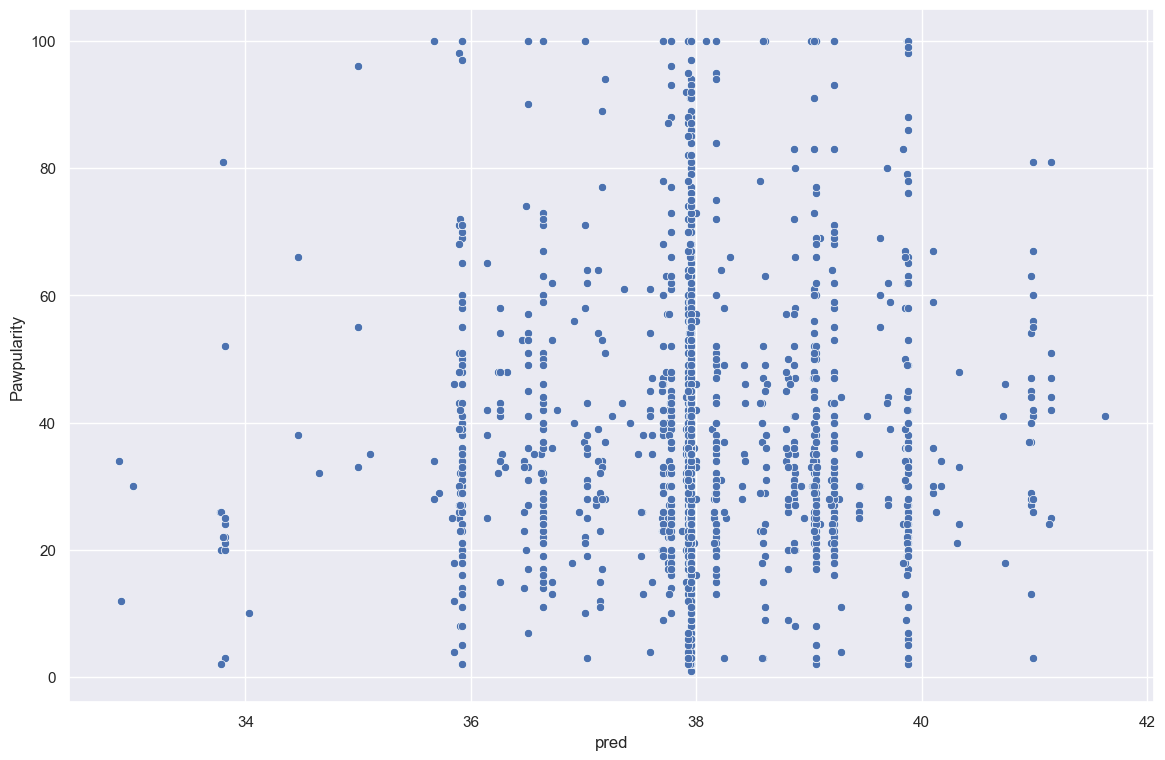

In [92]:
## True value / pred value plot:
sns.scatterplot(x=test["pred"], y=test["Pawpularity"])

<Axes: ylabel='Count'>

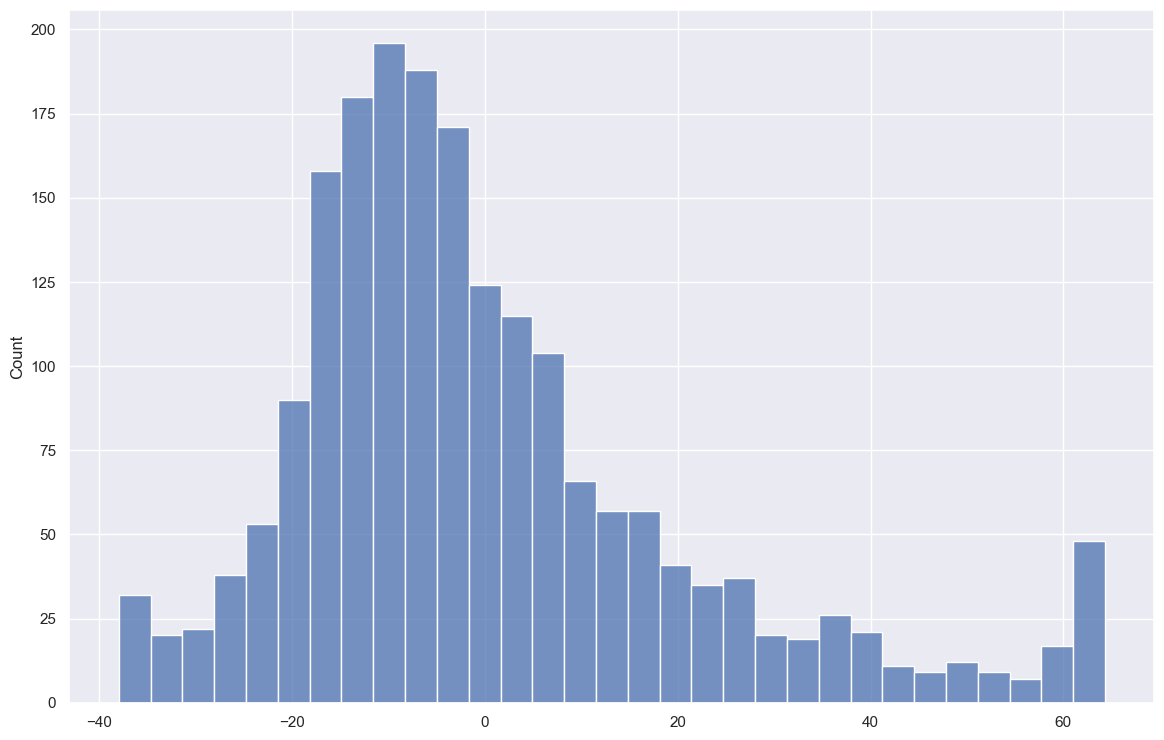

In [93]:
## Errors distribution:
sns.histplot(test["Pawpularity"] - test["pred"])

**Compare several regression models (L1, L2 regularization), select the best. Don't forget to tune hyperparams**

Print your best score and what type of regression you used to achieve it:

In [94]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# L1 
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_
lasso_pred = lasso_best.predict(X_test)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)

# L2
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_
ridge_pred = ridge_best.predict(X_test)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)

print("Best Lasso RMSE:", lasso_rmse, "with alpha:", lasso_cv.best_params_['alpha'])
print("Best Ridge RMSE:", ridge_rmse, "with alpha:", ridge_cv.best_params_['alpha'])


Best Lasso RMSE: 20.620434481359684 with alpha: 0.1
Best Ridge RMSE: 20.61294879683022 with alpha: 100


### Polinomial Regression
Do polynomial features improve the score?

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

[make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) helps to combine several steps into one model

In [96]:
from sklearn.metrics import root_mean_squared_error

def polynomial_regression_with_best_score(model_name, model, param_grid, degrees, X_train, y_train, X_test, y_test, feature_names):
    best_rmse = float('inf')  
    best_degree = None
    best_alpha = None
    best_model = None
    
    for degree in degrees:
        pipeline = make_pipeline(PolynomialFeatures(degree), model)
        grid_cv = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_cv.fit(X_train, y_train)
        
        current_best_model = grid_cv.best_estimator_
        
        y_pred = current_best_model.predict(X_test)
        
        rmse = root_mean_squared_error(y_test, y_pred)
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_degree = degree
            best_alpha = grid_cv.best_params_[f'{model_name.lower()}__alpha']
            best_model = current_best_model
        
    print(f"\nBest {model_name} Polynomial Regression Results:")
    print(f"Best Degree: {best_degree}, Best Alpha: {best_alpha}, Best RMSE: {best_rmse}")

features = X_train.columns

degrees = [2, 3, 4]

lasso_param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

print("Lasso (L1 regularization) Polynomial Regression Results:")
polynomial_regression_with_best_score('Lasso', Lasso(), lasso_param_grid, degrees, X_train, y_train, X_test, y_test, features)

print("\nRidge (L2 regularization) Polynomial Regression Results:")
polynomial_regression_with_best_score('Ridge', Ridge(), ridge_param_grid, degrees, X_train, y_train, X_test, y_test, features)


Lasso (L1 regularization) Polynomial Regression Results:

Best Lasso Polynomial Regression Results:
Best Degree: 2, Best Alpha: 1, Best RMSE: 20.617506165697478

Ridge (L2 regularization) Polynomial Regression Results:

Best Ridge Polynomial Regression Results:
Best Degree: 3, Best Alpha: 100, Best RMSE: 20.574606963278633


In [97]:
# Hint: to check wieght use:
# list(zip(t.get_feature_names(input_features=features), model.steps[1][1].coef_)) # model's weights

### Feature selection

Let's use Lasso for feature selection. Sklearn's [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel) will help

In [98]:
from sklearn.feature_selection import SelectFromModel 

In [101]:

# Example dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for feature selection using Lasso and final prediction with Linear Regression
model = make_pipeline(
    StandardScaler(),  # Standardize features
    SelectFromModel(Lasso(alpha=0.01)),  # Feature selection using Lasso
    LinearRegression()  # Final model after feature selection
)

# Fit the pipeline to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE using root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)


Print your best score with feature selection:

In [102]:
print(f"Best RMSE after Lasso feature selection: {rmse}")

Best RMSE after Lasso feature selection: 21.002054375342976


Conclude the best approach for that data:
* compare baselines to the best ML approach
* estimate the difference in metrics how significant it is
* is it a good solution to use LR for this data